In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
import matplotlib.pyplot as plt
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/DATA_NEW.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()


In [9]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/DATA_NEW/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/DATA_NEW/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256))

Found 28 files belonging to 2 classes.
Found 16 files belonging to 2 classes.


In [10]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [11]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,847,809 (56.64 MB)

 Trainable params: 14,847,553 (56.64 MB)

 Non-trainable params: 256 (1.00 KB)

In [14]:

history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.5000 - loss: 0.7699 - val_accuracy: 0.5625 - val_loss: 0.6917
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.7857 - loss: 2.3809 - val_accuracy: 0.5000 - val_loss: 1.3351
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step - accuracy: 0.6786 - loss: 3.3090 - val_accuracy: 0.5000 - val_loss: 1.2491
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - accuracy: 0.9286 - loss: 1.0181 - val_accuracy: 0.5000 - val_loss: 1.4944
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 0.9286 - loss: 0.5284 - val_accuracy: 0.5000 - val_loss: 1.3128
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - accuracy: 1.0000 - loss: 4.4980e-04 - val_accuracy: 0.5000 - val_loss: 1.1378
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step - accuracy: 1.0000 - loss: 0.0100 - val_accuracy: 0.5000 - val_loss: 0.9963
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - accuracy: 1.0000 - loss: 0.0066 - val_accuracy: 0.4375 - val_loss:

In [15]:
import cv2

In [26]:
test_img = cv2.imread('/content/DATA_NEW/train/dog/dog.920.jpg',cv2.IMREAD_COLOR)

In [ ]:
import os
output=[]
for i in os.listdir():
  a=cv2.imread(i,cv2.IMREAD_COLOR)
  test_img = cv2.resize(a,(256,256))
  test_input = a.reshape((1,256,256,3))
  output.append(model.predict(test_input))



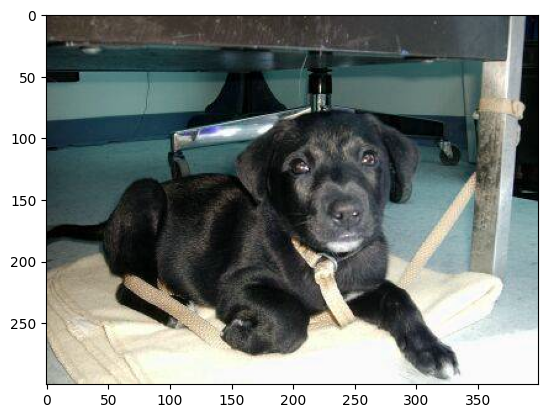

In [27]:
plt.imshow(test_img)

In [18]:
test_img.shape

(450, 374, 3)

In [28]:
test_img = cv2.resize(test_img,(256,256))

In [22]:
test_img.shape

(256, 256, 3)

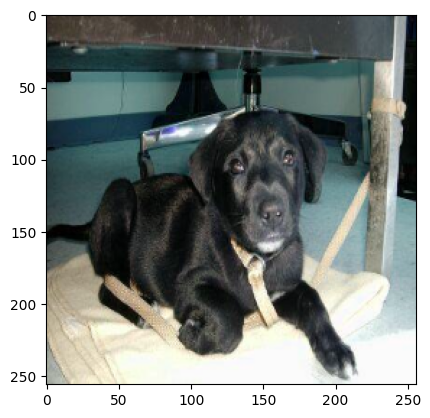

In [29]:
plt.imshow(test_img)

In [30]:
test_input = test_img.reshape((1,256,256,3))

In [25]:
model

<Sequential name=sequential_1, built=True>

In [31]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([[1.]], dtype=float32)